In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
- using SVD, a rank k approximation of a matrix, an image can be compressed by 
  utilizing only their dominant singular values
  
'''

In [3]:
# np.linalg.svd()

1016 x 1600 pixels
Original Size: 4876800 bytes


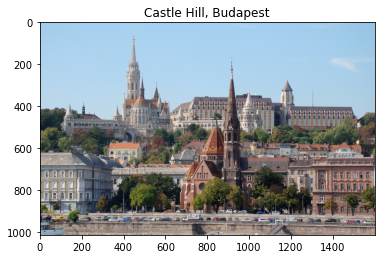

In [49]:
# image is imported using PIL library (1600 x 1016)
# test plot the original image

image = np.array(Image.open("../castle_hill.png"))
row, col, _ = image.shape
image_size = image.nbytes

print("{0} x {1} pixels".format(row, col))
print("Original Size: {} bytes".format(image_size))

plt.title("Castle Hill, Budapest")
plt.imshow(image)
plt.show()

In [27]:
# begin SVD process
# normalize the pixel data in the image (x / 255)
# separate each RGB channel into an individual m x n matrix

image = image / 255

img_r = image[:, :, 0]
img_g = image[:, :, 1]
img_b = image[:, :, 2]

U_r, D_r, V_r = np.linalg.svd(img_r, full_matrices = True)
U_g, D_g, V_g = np.linalg.svd(img_g, full_matrices = True)
U_b, D_b, V_b = np.linalg.svd(img_b, full_matrices = True)

svd_init_size = sum([matrix.nbytes for matrix in [U_r, D_r, V_r, U_g, D_g, V_g, U_b, D_b, V_b]])
print("Size to be compressed: {} bytes".format(svd_init_size))

Size to be compressed: 86238528 bytes


In [54]:
# - now choosing a k by which the image will be compressed
# - only the first k singular values will be regarded,

# - either A) negligible singular values will be set to 0
#   or B) matrices will be reformed around the number of singular values
# - there are min(m, n) = 1016 singular values to range k between

k = 15

U_r_k = U_r[:, 0:k] 
D_r_k = D_r[0:k]
V_r_k = V_r[0:k, :]

U_g_k = U_g[:, 0:k] 
D_g_k = D_g[0:k]
V_g_k = V_g[0:k, :]

U_b_k = U_b[:, 0:k] 
D_b_k = D_b[0:k]
V_b_k = V_b[0:k, :]

svd_comp_size = sum([matrix.nbytes for matrix in [U_r_k, D_r_k, V_r_k, U_g_k, D_g_k, V_g_k, U_b_k, D_b_k, V_b_k]])
print("Compressed Image Size: {} bytes".format(svd_comp_size))
print("Compression Ratio: {}".format(image_size / svd_comp_size))

Compressed Image Size: 942120 bytes
Compression Ratio: 5.176410648325054


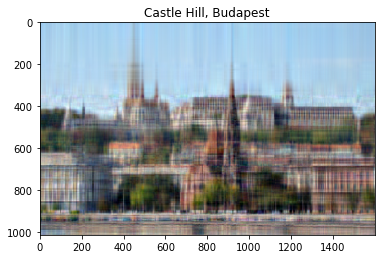

In [57]:
# now, reconstructing the image based on the SVD equation A = UD(V.T)
# for pixels that have an intensity outside of [0,1] range, pixels must be corrected
# plot the reconstructed image

image_reconstructed = np.zeros((row, col, 3))

image_r_approx = np.dot(U_r_k, np.dot(np.diag(D_r_k), V_r_k))
image_g_approx = np.dot(U_g_k, np.dot(np.diag(D_g_k), V_g_k))
image_b_approx = np.dot(U_b_k, np.dot(np.diag(D_b_k), V_b_k))

image_reconstructed[:, :, 0] = image_r_approx
image_reconstructed[:, :, 1] = image_g_approx
image_reconstructed[:, :, 2] = image_b_approx

image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

plt.title("Castle Hill, Budapest")
plt.imshow(image_reconstructed)
plt.show()